## CREDIT SCORING SYSTEM USING A MACHINE LEARNING APPROACH
### Arnold Somuah Asante

.

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import tree


import warnings
warnings.filterwarnings('ignore')

from collections import Counter


%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
te_df = pd.read_csv('test7.csv')
ta_df = pd.read_csv('train7.csv')

In [3]:
ta_df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [4]:
ta_df.shape

(100000, 28)

In [5]:
te_df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,30.996424,27 Years and 5 Months,No,18.816215,72.68014533363515,High_spent_Large_value_payments,452.30230675990265
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,NaN,1,...,3.0,Good,1303.01,35.229707,18 Years and 5 Months,No,246.992319,397.50365354404653,Low_spent_Medium_value_payments,854.2260270022115
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.220000,1,...,3.0,Good,1303.01,35.685836,18 Years and 6 Months,No,246.992319,453.6151305781054,Low_spent_Large_value_payments,788.1145499681528


In [6]:
te_df.shape

(50000, 27)

## Intepretation of the Data

- ID: Unique Identification of the record
- Customer_ID: Unique Identification of the customer
- Month: Month of the paticular year
- Name: The name of the person
- Age: The age of the person
- SSN: Social Security Number of the person
- Occupation: The occupation of the person
- Annual_Income: The Annual Income of the person (Income per Year)
- Monthly_Inland_Salary: Monthly in-hand salary of the person (-taxes and squad)
- Num_Bank_Accounts: The number of bank accounts of the person
- Num_Credit_Card: Number of credit cards the person has
- Interest_Rate: The interest rate on the credit card of the person
- Num_of_Loan: The number of loans taken by the person from the bank
- Type_of_Loan: The types of loans taken by the person from the bank
- Delay_from_due_date: The average number of days delayed by the person from the date of payment
- Num_of_Delayed_Payment: Number of payments delayed by the person
- Changed_Credit_Card: The percentage change in the credit card limit of the person
- Num_Credit_Inquiries: The number of credit card inquiries by the person
- Credit_Mix: Classification of Credit Mix of the customer
- Outstanding_Debt: The outstanding balance of the person
- Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer
- Credit_History_Age: The age of the credit history of the person
- Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no.
- Total_EMI_per_month: The total EMI per month of the person
- Amount_invested_monthly: The monthly amount invested by the person
- Payment_Behaviour: The payment behaviour of the person
- Monthly_Balance: The monthly balance left in the account of the person
- Credit_Score: The credit score of the person


In [7]:
ta_df.drop(['ID','Customer_ID','Month','Name','SSN','Type_of_Loan','Credit_History_Age']
               ,axis=1,inplace=True)

ta_df.head(10)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4,3,7,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,3,4,3,4,5,4,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,23,Scientist,19114.12,NaN,3,4,3,4,8,4,...,4.0,Good,809.98,27.262259,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,23,Scientist,19114.12,1824.843333,3,4,3,4,3,8_,...,4.0,Good,809.98,22.537593,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,23,Scientist,19114.12,1824.843333,3,4,3,4,3,6,...,4.0,Good,809.98,23.933795,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,28_,_______,34847.84,3037.986667,2,4,6,1,3,4,...,2.0,Good,605.03,24.464031,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,28,Teacher,34847.84,3037.986667,2,4,6,1,7,1,...,2.0,Good,605.03,38.550848,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [8]:
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   object 
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  ob

In [9]:
# Checking for the number of missing value
ta_df.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [10]:
#checking for the number of duplicate rows in a Pandas DataFrame 
ta_df.duplicated().sum()

0

In [11]:
#filtering the te_df test data DataFrame by selecting  rows that have less than three missing values across all columns.

size_pre_cleaning = te_df.shape
te_df = te_df[te_df.isnull().sum(axis=1) < 3]

In [12]:
te_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49228 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        49228 non-null  object 
 1   Customer_ID               49228 non-null  object 
 2   Month                     49228 non-null  object 
 3   Name                      44611 non-null  object 
 4   Age                       49228 non-null  object 
 5   SSN                       49228 non-null  object 
 6   Occupation                49228 non-null  object 
 7   Annual_Income             49228 non-null  object 
 8   Monthly_Inhand_Salary     42248 non-null  float64
 9   Num_Bank_Accounts         49228 non-null  int64  
 10  Num_Credit_Card           49228 non-null  int64  
 11  Interest_Rate             49228 non-null  int64  
 12  Num_of_Loan               49228 non-null  object 
 13  Type_of_Loan              43931 non-null  object 
 14  Delay_

In [13]:
#Creating a function for cleaning and standardizing data that has inconsistent formatting.

def filter_general(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif '_' in str(value):
        return str(value).split('_')[0]
    else:
        return str(value)

In [14]:
# Creating a function for cleaning and standardizing data that has inconsistent formatting but particularly for 
# the delayed payment data.

def filter_delayed_payments(value):
    if "__" in str(value):
        return str(value).split("__")[1]
    elif '_' in str(value):
        return str(value).replace("_", "")
    elif str(value) == '_':
        return str(value)
    else:
        return str(value)


In [15]:

def Amount_invested_monthly(col):
    if "__" in str(col):
        return str(col).split("__")[1]
    else:
        return str(col)

In [16]:
ta_df.head(10)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4,3,7,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,3,4,3,4,5,4,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,23,Scientist,19114.12,NaN,3,4,3,4,8,4,...,4.0,Good,809.98,27.262259,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,23,Scientist,19114.12,1824.843333,3,4,3,4,3,8_,...,4.0,Good,809.98,22.537593,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,23,Scientist,19114.12,1824.843333,3,4,3,4,3,6,...,4.0,Good,809.98,23.933795,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,28_,_______,34847.84,3037.986667,2,4,6,1,3,4,...,2.0,Good,605.03,24.464031,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,28,Teacher,34847.84,3037.986667,2,4,6,1,7,1,...,2.0,Good,605.03,38.550848,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [17]:
ta_df["Amount_invested_monthly"]=ta_df["Amount_invested_monthly"].apply(Amount_invested_monthly)
ta_df["Amount_invested_monthly"]=ta_df["Amount_invested_monthly"].astype("float")

In [18]:
ta_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000,95521.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217,637.412998
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270,2043.319327
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660,74.534002
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473,135.925682
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249,265.731733
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000,10000.000000


In [19]:
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   object 
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  ob

In [20]:
ta_df["Changed_Credit_Limit"]=ta_df["Changed_Credit_Limit"].apply(lambda x:x.split("-")[-1])
ta_df.drop(ta_df[ta_df["Changed_Credit_Limit"]=="_"].index,inplace=True)
ta_df["Changed_Credit_Limit"]=ta_df["Changed_Credit_Limit"].astype("float")

In [21]:
ta_df.drop(ta_df[ta_df["Monthly_Balance"]=='__-333333333333333333333333333__'].index,inplace=True)
for i in ['Age', 'Annual_Income', 'Num_of_Loan', 'Outstanding_Debt', 'Monthly_Balance']:
    ta_df[i] = ta_df[i].apply(filter_general)
    ta_df[i] = ta_df[i].astype(np.float64)
    print(i + " Cleaned Successfully")


Age Cleaned Successfully
Annual_Income Cleaned Successfully
Num_of_Loan Cleaned Successfully
Outstanding_Debt Cleaned Successfully
Monthly_Balance Cleaned Successfully


In [22]:
ta_df['Num_of_Delayed_Payment'] = ta_df['Num_of_Delayed_Payment'].apply(filter_delayed_payments)
ta_df['Num_of_Delayed_Payment'] = ta_df['Num_of_Delayed_Payment'].astype(np.float64)

In [23]:

ta_df['Occupation'] = ta_df['Occupation'].replace('_______', np.nan)
ta_df['Occupation'] = ta_df['Occupation'].fillna(np.random.choice(pd.Series(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))

In [24]:
ta_df['Credit_Mix'] = ta_df['Credit_Mix'].replace('_', np.nan)
ta_df['Credit_Mix'] = ta_df['Credit_Mix'].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))

In [25]:
ta_df['Payment_of_Min_Amount'] = ta_df['Payment_of_Min_Amount'].replace('NM', np.nan)
ta_df['Payment_of_Min_Amount'] = ta_df['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))

In [26]:
ta_df['Payment_Behaviour'] = ta_df['Payment_Behaviour'].replace('!@9#%8', np.nan)
ta_df['Payment_Behaviour'] = ta_df['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments'])))

In [27]:
for i in ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly']:
    ta_df[i].fillna(ta_df[i].median(), inplace=True)

In [28]:
ta_df['Monthly_Balance'].fillna(ta_df['Monthly_Balance'].median(), inplace=True)

In [29]:
ta_df.head(10)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,4.0,Bad,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,3091.260833,3,4,3,4.0,-1,14.0,...,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,23.0,Scientist,19114.12,3091.260833,3,4,3,4.0,5,4.0,...,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,14.0,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,23.0,Scientist,19114.12,3091.260833,3,4,3,4.0,8,4.0,...,4.0,Good,809.98,27.262259,No,49.574949,62.430172,High_spent_Medium_value_payments,340.479212,Good
6,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,8.0,...,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,6.0,...,4.0,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,28.0,Doctor,34847.84,3037.986667,2,4,6,1.0,3,4.0,...,2.0,Good,605.03,24.464031,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,7,1.0,...,2.0,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
10,28.0,Teacher,34847.84,3037.986667,2,1385,6,1.0,3,-1.0,...,2.0,Bad,605.03,33.224951,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard


In [30]:
ta_df.describe(include='all').style.set_properties(**{'font-family':'Times New Roman'})

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,97900.000000,97900,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900,97900.000000,97900.000000,97900,97900.000000,97900.000000,97900,97900.000000,97900
unique,nan,15,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3,nan,nan,2,nan,nan,6,nan,3
top,nan,Doctor,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Bad,nan,nan,Yes,nan,nan,Low_spent_Small_value_payments,nan,Standard
freq,nan,12866,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,38377,nan,nan,62968,nan,nan,24959,nan,52076
mean,119.903371,nan,175934.197698,4026.671541,17.075863,22.519642,72.271532,10.741992,21.075117,29.793841,10.465545,27.295996,nan,1426.613476,32.281389,nan,1406.898838,615.227515,nan,401.596439,nan
std,687.221649,nan,1425711.671398,2960.795886,117.173367,129.223810,466.306319,61.565651,14.865503,218.323491,6.670756,190.946896,nan,1155.544499,5.114578,nan,8314.901431,2000.512234,nan,212.535948,nan
min,14.000000,nan,7005.930000,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,0.000000,0.000000,nan,0.230000,20.000000,nan,0.000000,0.000000,nan,0.007760,nan
25%,25.000000,nan,19436.305000,1790.959167,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.350000,3.000000,nan,566.080000,28.049067,nan,30.338701,76.949795,nan,270.917679,nan
50%,34.000000,nan,37573.920000,3091.260833,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,nan,1166.370000,32.300332,nan,69.272824,135.799125,nan,336.639979,nan
75%,42.000000,nan,72760.040000,5370.100000,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.870000,9.000000,nan,1946.810000,36.491015,nan,161.487532,254.905860,nan,467.378940,nan


In [31]:
ta_df['Occupation'].value_counts()

Doctor           12866
Lawyer            6424
Architect         6241
Engineer          6208
Scientist         6172
Mechanic          6167
Accountant        6134
Developer         6111
Media_Manager     6106
Teacher           6089
Entrepreneur      6037
Journalist        5952
Manager           5841
Musician          5792
Writer            5760
Name: Occupation, dtype: int64

In [32]:
ta_df.nunique()

Age                          1698
Occupation                     15
Annual_Income               13463
Monthly_Inhand_Salary       13231
Num_Bank_Accounts             931
Num_Credit_Card              1173
Interest_Rate                1705
Num_of_Loan                   403
Delay_from_due_date            73
Num_of_Delayed_Payment        700
Changed_Credit_Limit         3762
Num_Credit_Inquiries         1206
Credit_Mix                      3
Outstanding_Debt            12203
Credit_Utilization_Ratio    97900
Payment_of_Min_Amount           2
Total_EMI_per_month         14887
Amount_invested_monthly     89143
Payment_Behaviour               6
Monthly_Balance             96719
Credit_Score                    3
dtype: int64

<AxesSubplot:xlabel='Credit_Score', ylabel='Count'>

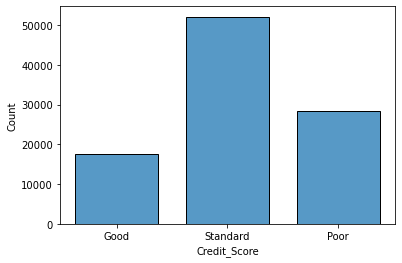

In [33]:
sb.histplot(ta_df['Credit_Score'], shrink=0.75)

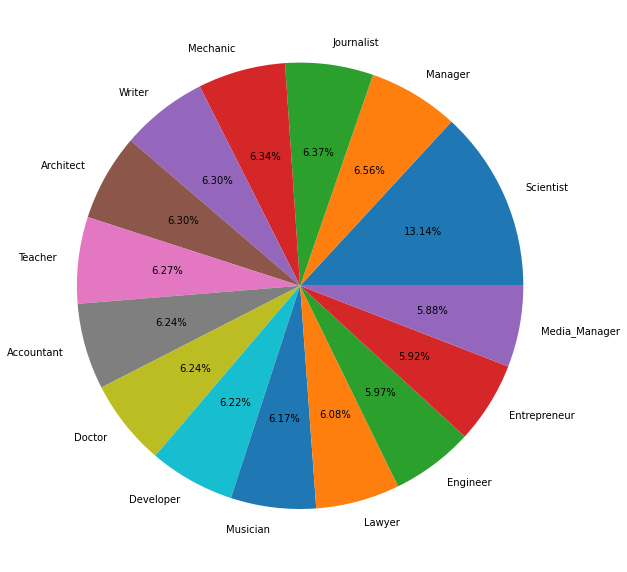

In [34]:
Occupation = ta_df['Occupation'].value_counts().tolist()
labels = ta_df['Occupation'].values.tolist()
labels = list(set(labels))
plt.figure(figsize = (10,15))
plt.pie(Occupation, labels = labels, autopct = '%1.2f%%')
plt.show()

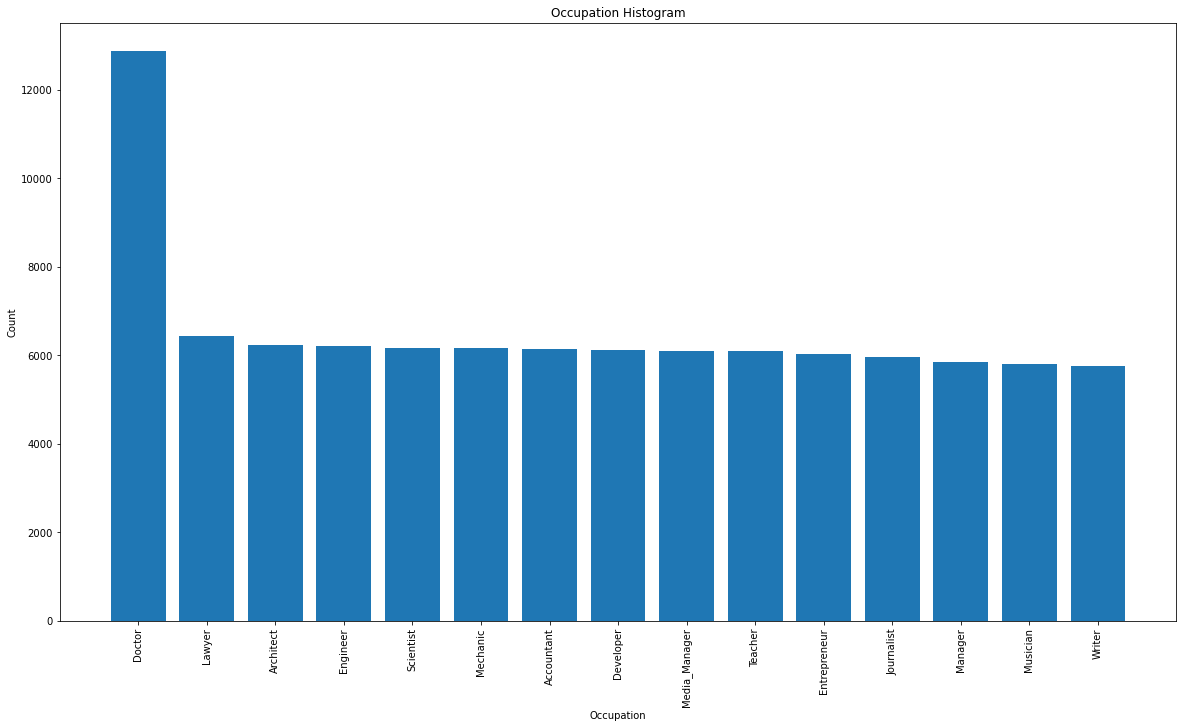

In [35]:
Occupation_counts = ta_df['Occupation'].value_counts()
fig = plt.figure(figsize= [20,11])
# create a bar chart of the occupation counts
plt.bar(Occupation_counts.index, Occupation_counts.values)

# set the title and axis labels
plt.title('Occupation Histogram')
plt.xlabel('Occupation')
plt.ylabel('Count')

# rotate the x-axis labels to make them more readable
plt.xticks(rotation=90)

# display the histogram
plt.show()

The dataset is not evenly distributed with respect to the occupation. A we can see that most of the

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Num_Bank_Accounts'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Num_Credit_Inquiries'}>,
        <AxesSubplot:title={'center':'Outstanding_Debt'}>],
       [<AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Total_EMI_per_month'}>,
        <AxesSubplot:title={'center':'Amount_invested_monthly'}>,
        <AxesSubplot:title={'center':'Monthly_Balance'}>]], dtype=object)

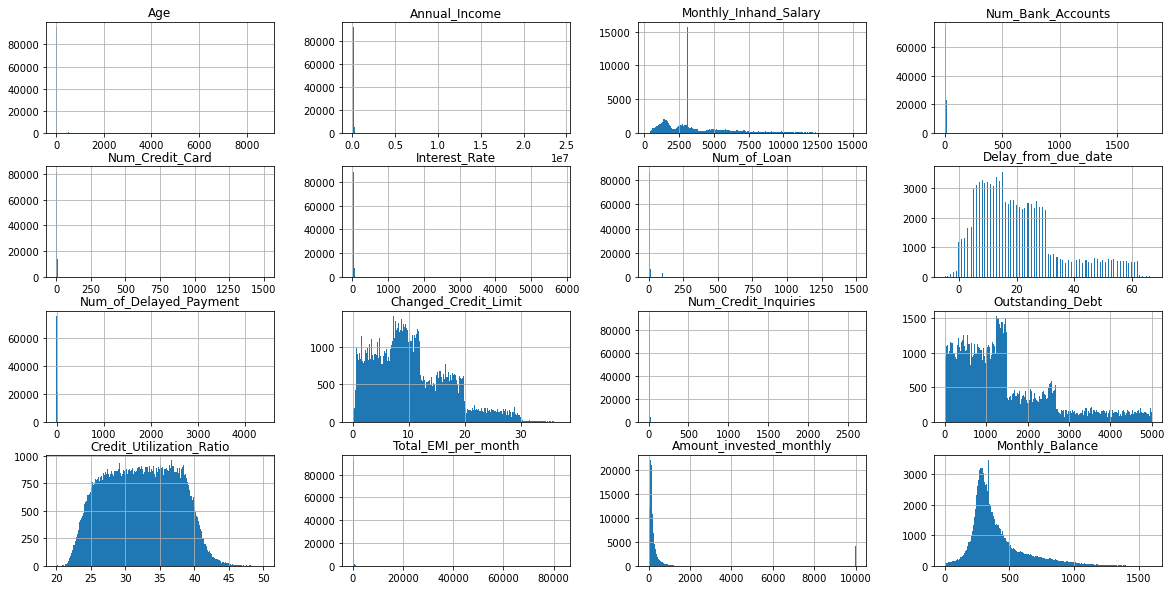

In [36]:
ta_df.hist(bins=200,figsize=[20,10])

In [37]:
def pie_plot(ta_df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        ta_df[col].value_counts().plot(ax=ax, kind='pie', figsize=(20, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()
    

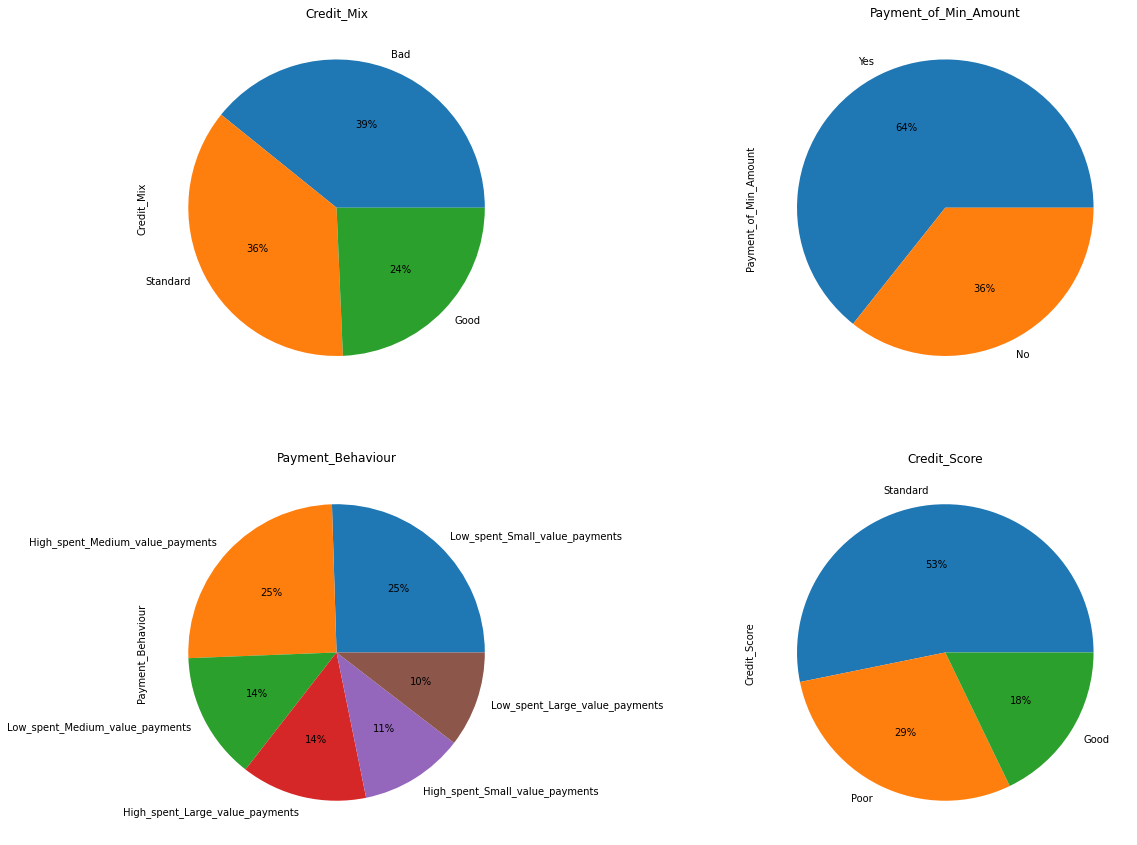

In [38]:
pie_plot(ta_df, ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'], 2,2)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

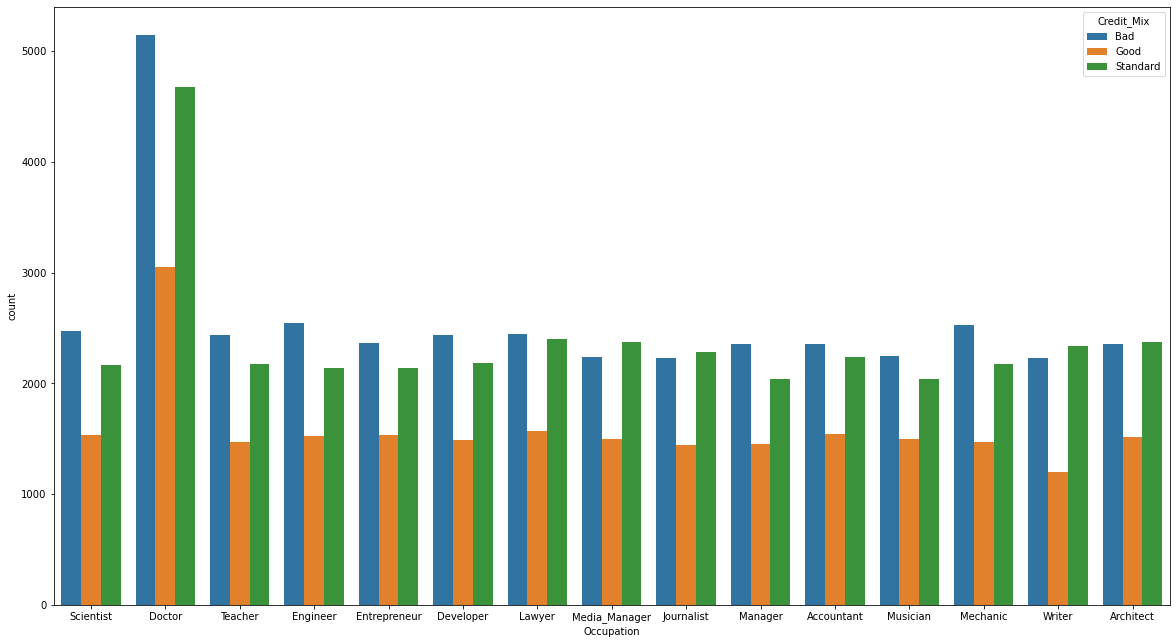

In [39]:
fig = plt.figure(figsize= [20,11])
sb.countplot(data=ta_df,x="Occupation",hue="Credit_Mix")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

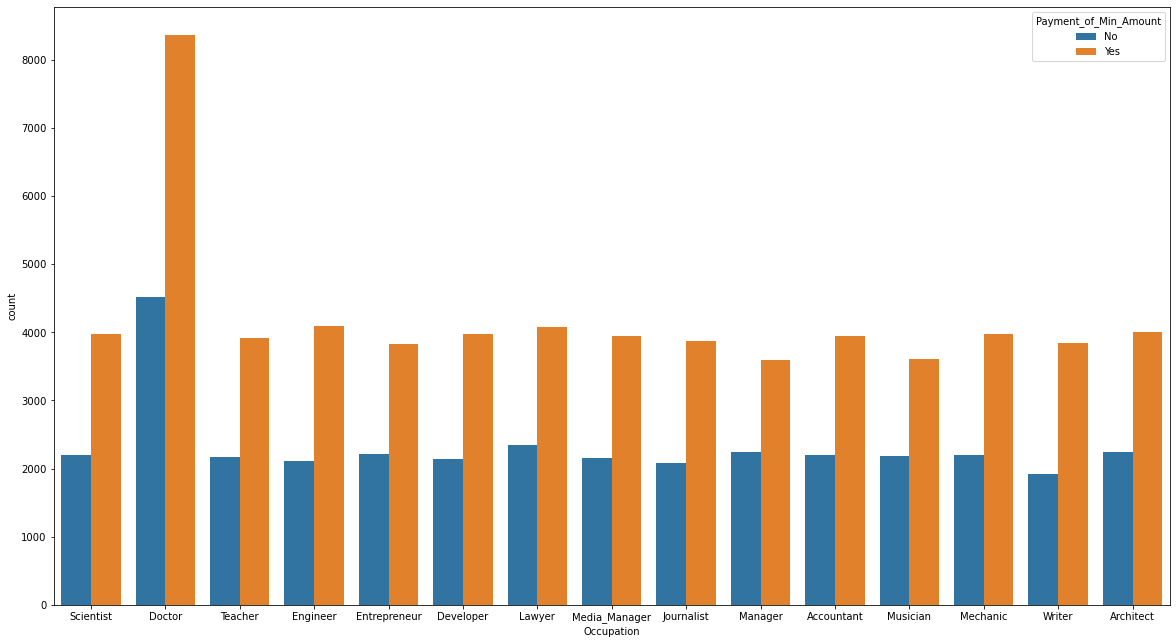

In [40]:
fig = plt.figure(figsize= [20,11])
sb.countplot(data=ta_df,x="Occupation",hue="Payment_of_Min_Amount")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

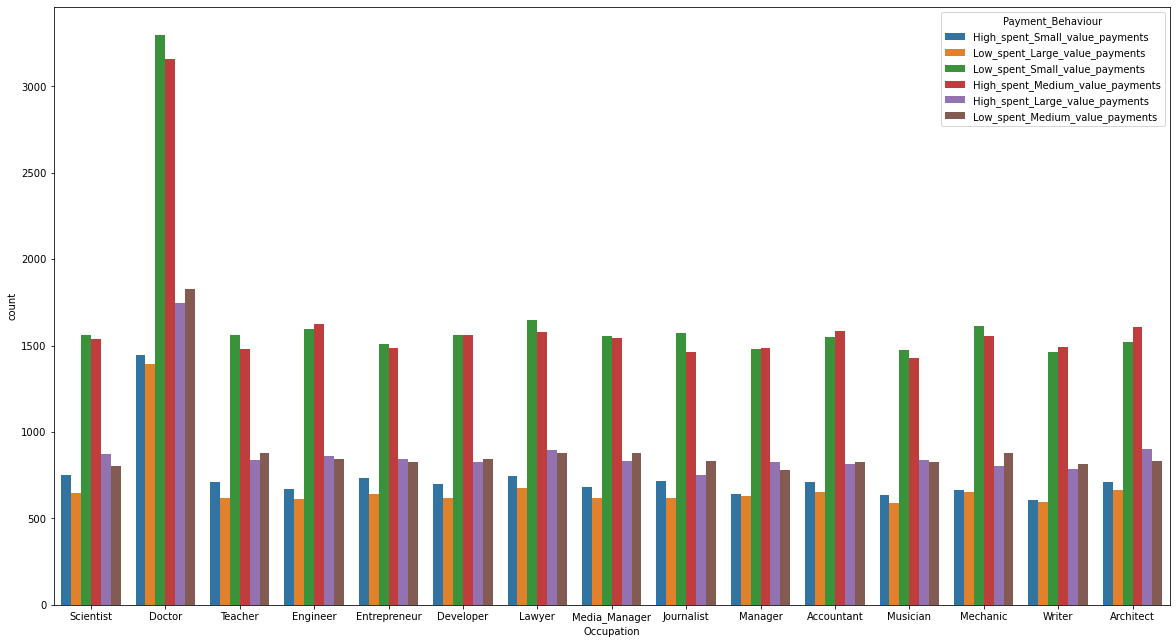

In [41]:
fig = plt.figure(figsize= [20,11])
sb.countplot(data=ta_df,x="Occupation",hue="Payment_Behaviour")

In [42]:
numeric_cols = ta_df.select_dtypes(exclude = "object").columns
cat_cols = te_df.select_dtypes(include = "object").columns
numeric_cols

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [43]:
cat_cols

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
vif_df = ta_df[numeric_cols]

vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(17)

,feature,VIF
0,Age,1.030038
1,Annual_Income,1.016180
2,Monthly_Inhand_Salary,4.749318
3,Num_Bank_Accounts,1.021308
4,Num_Credit_Card,1.029837
5,Interest_Rate,1.023873
6,Num_of_Loan,1.030466
7,Delay_from_due_date,4.437336
8,Num_of_Delayed_Payment,1.018731
9,Changed_Credit_Limit,4.289836


<AxesSubplot:>

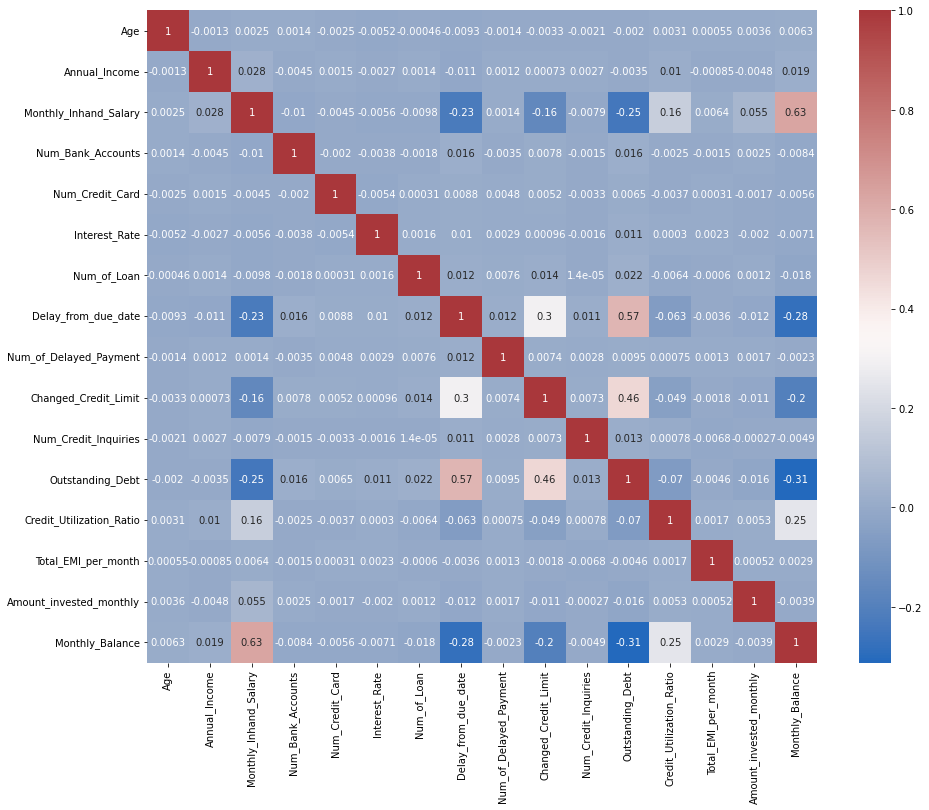

In [46]:
plt.figure(figsize= (15,12))
sb.heatmap(ta_df[numeric_cols].corr(),annot=True ,cmap = 'vlag')

In [47]:
def box_plot(ta_df, num_cols):
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
        if i == 16:
            break
        else:
            plt.subplot(4,4, i+1)
            l = num_cols[i]
            sb.boxplot(ta_df[l], palette="Accent")

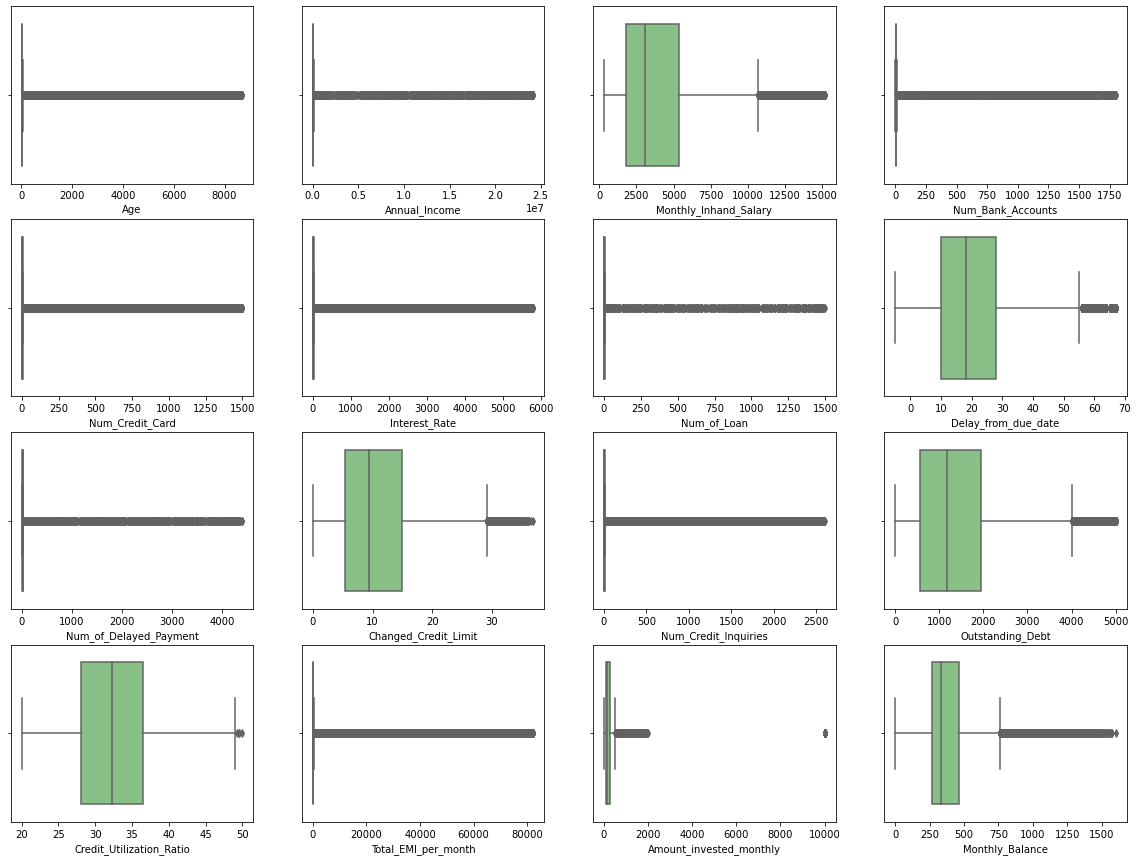

In [48]:
box_plot(ta_df, numeric_cols)

In [49]:
def RobustScaling(df_num, cols):
    scaler = preprocessing.RobustScaler()
    robust_df_temp = scaler.fit_transform(df_num)
    robust_df_temp = pd.DataFrame(robust_df_temp, columns =cols)
    return robust_df_temp

In [50]:
ta_df[numeric_cols] = RobustScaling(ta_df[numeric_cols], numeric_cols)
ta_df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-0.647059,Scientist,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,...,-0.333333,Bad,-0.258117,-0.648868,No,-0.150195,-0.311222,High_spent_Small_value_payments,-0.122904,Good
1,-0.647059,Scientist,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-1.055556,0.000000,...,-0.333333,Good,-0.258117,-0.042096,No,-0.150195,-0.098445,Low_spent_Large_value_payments,-0.264738,Good
3,-0.647059,Scientist,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.666667,0.000000,...,-0.333333,Good,-0.258117,-0.888774,No,-0.150195,-0.530350,Low_spent_Small_value_payments,0.024683,Good
4,-0.647059,Scientist,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-0.555556,-1.111111,...,-0.333333,Good,-0.258117,-0.596790,No,-0.150195,-0.412287,High_spent_Medium_value_payments,0.019542,Good
5,-0.647059,Scientist,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.666667,...,-0.333333,Good,-0.258117,-1.156456,No,-0.150195,0.239076,High_spent_Medium_value_payments,-0.468666,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,Mechanic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Bad,NaN,NaN,No,NaN,NaN,High_spent_Large_value_payments,NaN,Poor
99996,NaN,Mechanic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Bad,NaN,NaN,No,NaN,NaN,High_spent_Medium_value_payments,NaN,Poor
99997,NaN,Mechanic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Good,NaN,NaN,No,NaN,NaN,High_spent_Large_value_payments,NaN,Poor
99998,NaN,Mechanic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Good,NaN,NaN,No,NaN,NaN,Low_spent_Large_value_payments,NaN,Standard


In [51]:
#ta_df['Credit_Score'].replace({"Poor":0, "Standard":1, "Good":2}, inplace=True)
#ta_df['Credit_Mix'].replace({"Bad":0, "Standard":1, "Good":2}, inplace=True)
#ta_df['Payment_of_Min_Amount'].replace({"Yes":1, "No":0}, inplace=True)

# Check if the columns 'Occupation' and 'Payment_Behaviour' are present in ta_df
#if 'Occupation' in ta_df.columns and 'Payment_Behaviour' in ta_df.columns:
    #ta_df = pd.get_dummies(ta_df, columns = ['Occupation', 'Payment_Behaviour'])


#ta_df

# Define mapping dictionaries for column value replacements
credit_score_map = {"Poor": 0, "Standard": 1, "Good": 2}
credit_mix_map = {"Bad": 0, "Standard": 1, "Good": 2}
payment_min_amount_map = {"Yes": 1, "No": 0}

# Replace column values using map method instead of multiple replace() calls
ta_df['Credit_Score'] = ta_df['Credit_Score'].map(credit_score_map)
ta_df['Credit_Mix'] = ta_df['Credit_Mix'].map(credit_mix_map)
ta_df['Payment_of_Min_Amount'] = ta_df['Payment_of_Min_Amount'].map(payment_min_amount_map)

# Check if 'Occupation' and 'Payment_Behaviour' columns exist in ta_df
if 'Occupation' in ta_df.columns and 'Payment_Behaviour' in ta_df.columns:
    ta_df = pd.get_dummies(ta_df, columns=['Occupation', 'Payment_Behaviour'])

ta_df.describe(include = 'all')


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
count,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,...,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000
mean,5.046371,2.580303,0.261608,2.778730,5.830107,4.943815,1.934943,0.170714,1.742877,0.111260,...,0.059162,0.063044,0.062196,0.058836,0.137263,0.251195,0.113585,0.104413,0.138601,0.254944
std,40.353117,26.627962,0.827341,29.326294,43.023892,38.903595,15.411010,0.825757,24.160934,0.700494,...,0.235930,0.243043,0.241513,0.235318,0.344126,0.433703,0.317309,0.305797,0.345531,0.435832
min,-1.176471,-0.573253,-0.778850,-1.750000,-1.666667,-1.000000,-0.750000,-1.277778,-1.888889,-0.987395,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.529412,-0.340155,-0.363515,-0.750000,-0.333333,-0.416667,-0.250000,-0.444444,-0.555556,-0.426471,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.470588,0.660438,0.637384,0.250000,0.666667,0.583333,0.750000,0.555556,0.444444,0.572479,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,509.647059,453.090694,3.384436,448.000000,498.000000,482.000000,373.250000,2.722222,487.000000,2.896008,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97900 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 95839 non-null  float64
 1   Annual_Income                                       95839 non-null  float64
 2   Monthly_Inhand_Salary                               95839 non-null  float64
 3   Num_Bank_Accounts                                   95839 non-null  float64
 4   Num_Credit_Card                                     95839 non-null  float64
 5   Interest_Rate                                       95839 non-null  float64
 6   Num_of_Loan                                         95839 non-null  float64
 7   Delay_from_due_date                                 95839 non-null  float64
 8   Num_of_Delayed_Payment                              95839 non-null  float64


In [53]:
ta_df.head(15)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.196429,...,0,1,0,0,0,0,1,0,0,0
1,-0.647059,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-1.055556,0.000000,0.196429,...,0,1,0,0,0,0,0,1,0,0
3,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.666667,0.000000,0.196429,...,0,1,0,0,0,0,0,0,0,1
4,-0.647059,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-0.555556,-1.111111,-0.013655,...,0,1,0,0,0,1,0,0,0,0
5,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.666667,0.196429,...,0,1,0,0,0,1,0,0,0,0
6,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.888889,0.196429,...,0,1,0,0,0,0,0,0,0,1
7,-0.352941,-0.051123,-0.014885,-1.00,-0.333333,-0.583333,-0.50,-0.833333,-1.111111,-0.418067,...,0,1,0,0,0,1,0,0,0,0
8,-0.352941,-0.051123,-0.014885,-1.00,-0.333333,-0.583333,-0.50,-0.611111,-1.444444,-0.207983,...,0,0,0,0,0,0,0,0,0,1
9,-0.352941,-0.051123,-0.014885,-1.00,460.000000,-0.583333,-0.50,-0.833333,-1.666667,-0.418067,...,0,0,1,0,1,0,0,0,0,0
10,-0.352941,-0.051123,0.000000,-1.00,-0.333333,-0.583333,-0.50,-0.833333,-1.222222,-0.418067,...,0,0,1,0,1,0,0,0,0,0


In [54]:
for i in numeric_cols:
    ta_df[i].fillna(method='ffill', inplace=True)


In [55]:
X = ta_df.drop(['Credit_Score'],axis=1)
y = ta_df['Credit_Score']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [57]:
lr = LogisticRegression(n_jobs=-1,random_state=17,)

In [58]:
param = {'C': range(0,11)}

In [59]:
lr_greed = GridSearchCV(lr,param,cv=5)

In [60]:
lr_greed.fit(X_train,y_train)

/Users/arnoldsomuah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arnoldsomuah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/arnoldsomuah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arnoldsomuah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/arnoldsomuah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arnoldsomuah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/arnoldsomuah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arnoldsomuah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=17),
             param_grid={'C': range(0, 11)})

In [61]:
lr_best = lr_greed.best_estimator_

In [62]:
lr_best.score(X_test,y_test)

0.5613891726251277

In [63]:
clf_rf = RandomForestClassifier(n_jobs=-1,random_state=17)

In [64]:
parametrs = {"n_estimators": [5,10,20,30], 'max_depth': range(1, 10)}

In [65]:
clf_rf_grid = GridSearchCV(clf_rf, parametrs, cv=5)

In [66]:
clf_rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=17),
             param_grid={'max_depth': range(1, 10),
                         'n_estimators': [5, 10, 20, 30]})

In [67]:
rf_best = clf_rf_grid.best_estimator_

In [68]:
rf_best.score(X_test,y_test)

0.5753830439223697

In [69]:

# Define the hyperparameter grid for decision tree
param_grid = {'max_depth': range(1, 11)}

# Create and fit the decision tree model with grid search cross-validation
dt = DecisionTreeClassifier(random_state=17)
dt_grid = GridSearchCV(dt, param_grid, cv=5)
dt_grid.fit(X_train, y_train)

# Retrieve the best estimator
dt_best = dt_grid.best_estimator_

# Evaluate the performance of the best estimator on the test data
y_pred = dt_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Estimator:", dt_best)
print("Accuracy on Test Data:", accuracy)



Best Estimator: DecisionTreeClassifier(max_depth=5, random_state=17)
Accuracy on Test Data: 0.585665645216207


In [70]:

# Create and fit the Naive Bayes Classifier model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Retrieve the best estimator (not applicable for Naive Bayes as it does not have hyperparameters)

# Evaluate the performance of the model on the test data
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on Test Data:", accuracy)




Accuracy on Test Data: 0.5226762002042901


In [71]:
te_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,49228,49228,0x160a,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,49228,12500,CUS_0xd40,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,49228,4,November,12332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,44611,10139,Stevex,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,49228,964,39,1469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSN,49228,12501,#F%$D@*&8,2785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,49228,16,_______,3382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,49228,16067,36585.12,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,42248.0,NaN,NaN,NaN,4177.020019,3171.712742,303.645417,1623.664167,3081.9025,5917.192741,15204.633333
Num_Bank_Accounts,49228.0,NaN,NaN,NaN,16.89705,116.742448,-1.0,4.0,6.0,7.0,1798.0


In [72]:
te_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

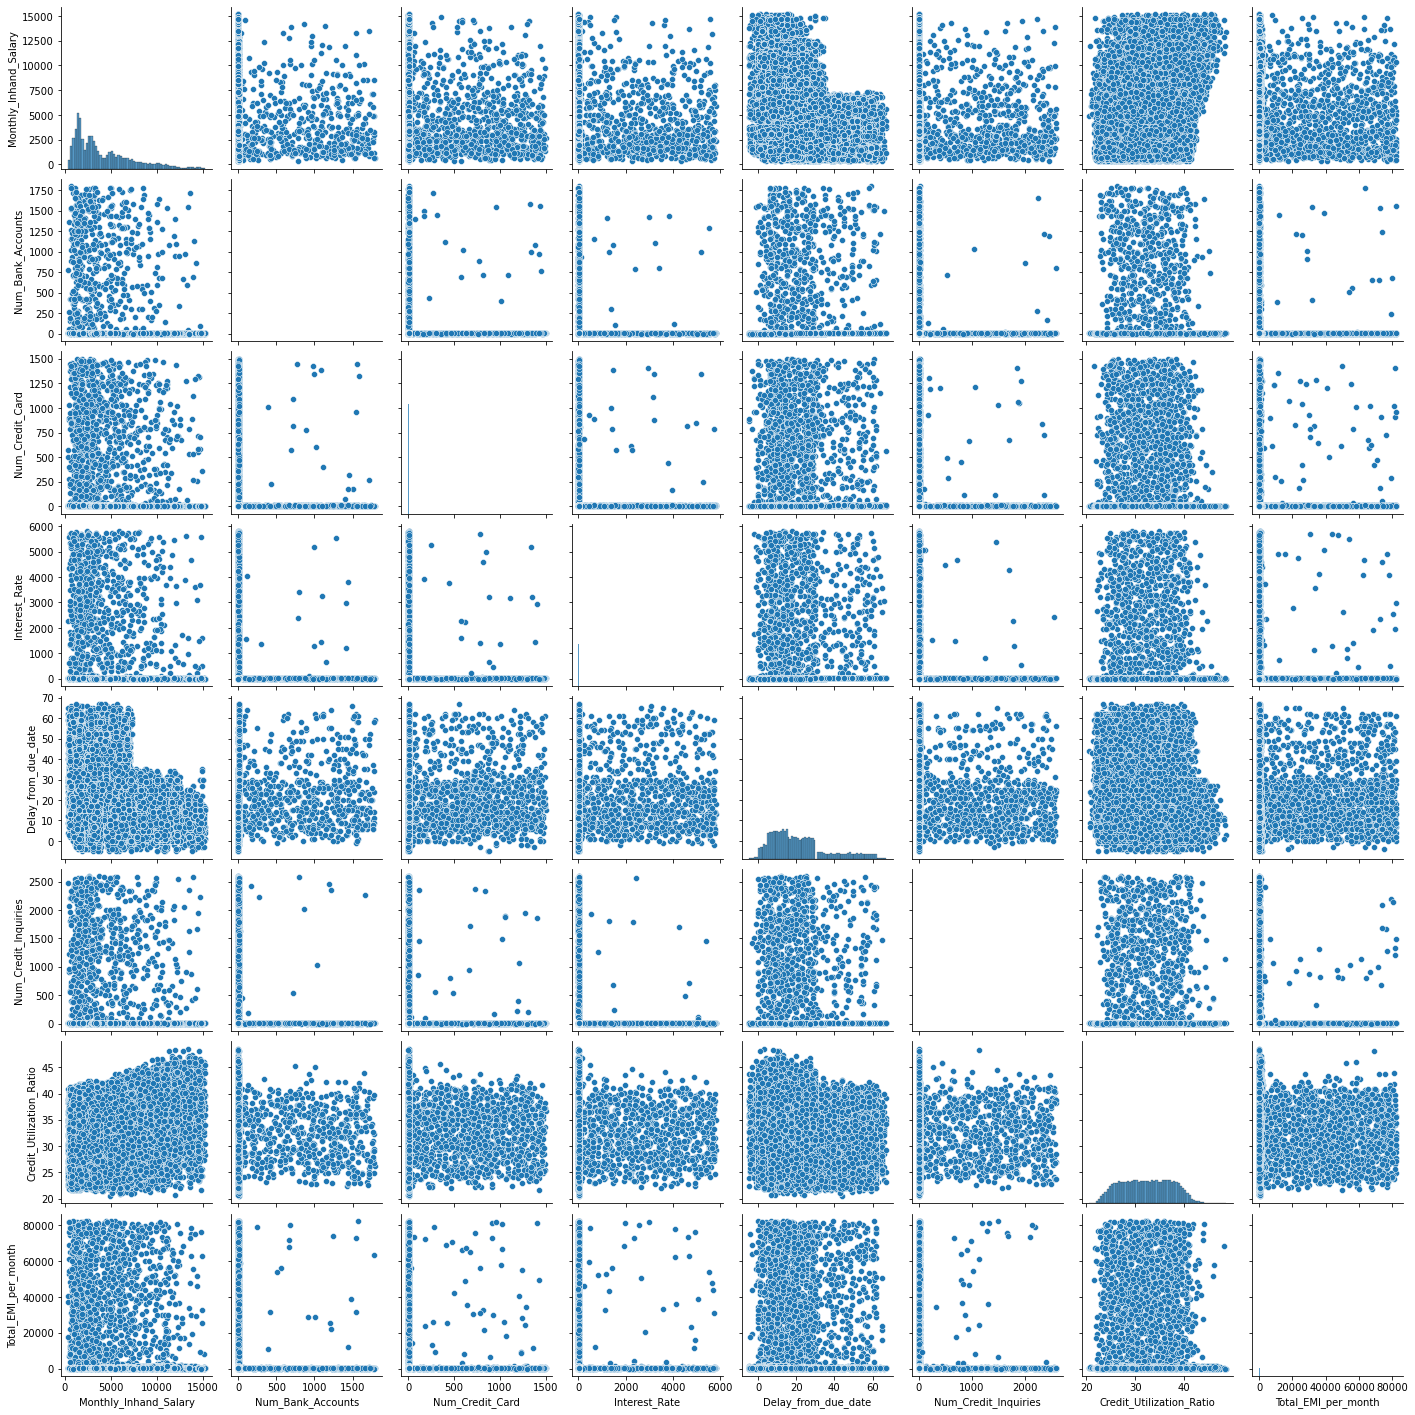

In [73]:
sb.pairplot(te_df)